In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [2]:
plt.style.use('seaborn-v0_8-pastel')

#### Conexión a base de datos

In [3]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

In [4]:
engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}",
                       connect_args={
                            'init_command': "SET SESSION net_read_timeout=600, net_write_timeout=600, max_execution_time=3000000"
                        }
                    )

#### Información de disponibilidad de bicicletas con 'BikeStationOccupancyFact'

##### Filtro de fechas

In [5]:
start_date = '2025-09-01 00:00:00'
end_date = '2025-09-01 23:59:59'

In [6]:
sql_bike_availability = f'''

SELECT 
    *
FROM BikeStationOccupancyFact
WHERE 
	creationDateTimeMs BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_BikeStationOccupancyFact = pd.read_sql(sql_bike_availability, engine)
df_sql_BikeStationOccupancyFact.head()

,id,availableBikes,availableDocks,creationDateTimeMs,expectedDocks,messageTableId,messageType,unavailableBikes,unavailableDocks,bikeStation_id,creationDate_id,creationTime_id
0,112295489,17,14,1756706418401,31,56090268,14853,0,17,527,1756684800000,10000
1,112295490,7,12,1756706422633,-1,50400405,14854,8,15,449,1756684800000,10000
2,112295491,4,32,1756706425363,39,56090269,14853,3,7,576,1756684800000,10000
3,112295492,7,20,1756706436430,27,56090270,14853,0,7,537,1756684800000,10000
4,112295493,19,11,1756706438798,35,56090271,14853,5,24,529,1756684800000,10000


In [7]:
df_sql_BikeStationOccupancyFact['datetime'] = pd.to_datetime(df_sql_BikeStationOccupancyFact['creationDateTimeMs'], unit='ms', utc=True).dt.tz_convert('America/Mexico_City')
df_sql_BikeStationOccupancyFact.head()

,id,availableBikes,availableDocks,creationDateTimeMs,expectedDocks,messageTableId,messageType,unavailableBikes,unavailableDocks,bikeStation_id,creationDate_id,creationTime_id,datetime
0,112295489,17,14,1756706418401,31,56090268,14853,0,17,527,1756684800000,10000,2025-09-01 00:00:18.401000-06:00
1,112295490,7,12,1756706422633,-1,50400405,14854,8,15,449,1756684800000,10000,2025-09-01 00:00:22.633000-06:00
2,112295491,4,32,1756706425363,39,56090269,14853,3,7,576,1756684800000,10000,2025-09-01 00:00:25.363000-06:00
3,112295492,7,20,1756706436430,27,56090270,14853,0,7,537,1756684800000,10000,2025-09-01 00:00:36.430000-06:00
4,112295493,19,11,1756706438798,35,56090271,14853,5,24,529,1756684800000,10000,2025-09-01 00:00:38.798000-06:00


In [8]:
# Obtener hora de la columna datetime
df_sql_BikeStationOccupancyFact['recordHour'] = df_sql_BikeStationOccupancyFact['datetime'].dt.hour
df_sql_BikeStationOccupancyFact['recordDay'] = df_sql_BikeStationOccupancyFact['datetime'].dt.day
df_sql_BikeStationOccupancyFact['recordMonth'] = df_sql_BikeStationOccupancyFact['datetime'].dt.month

# extraer hora con minutos y segundos
df_sql_BikeStationOccupancyFact['recordTime'] = df_sql_BikeStationOccupancyFact['datetime'].dt.time
df_sql_BikeStationOccupancyFact

,id,availableBikes,availableDocks,creationDateTimeMs,expectedDocks,messageTableId,messageType,unavailableBikes,unavailableDocks,bikeStation_id,creationDate_id,creationTime_id,datetime,recordHour,recordDay,recordMonth,recordTime
0,112295489,17,14,1756706418401,31,56090268,14853,0,17,527,1756684800000,10000,2025-09-01 00:00:18.401000-06:00,0,1,9,00:00:18.401000
1,112295490,7,12,1756706422633,-1,50400405,14854,8,15,449,1756684800000,10000,2025-09-01 00:00:22.633000-06:00,0,1,9,00:00:22.633000
2,112295491,4,32,1756706425363,39,56090269,14853,3,7,576,1756684800000,10000,2025-09-01 00:00:25.363000-06:00,0,1,9,00:00:25.363000
3,112295492,7,20,1756706436430,27,56090270,14853,0,7,537,1756684800000,10000,2025-09-01 00:00:36.430000-06:00,0,1,9,00:00:36.430000
4,112295493,19,11,1756706438798,35,56090271,14853,5,24,529,1756684800000,10000,2025-09-01 00:00:38.798000-06:00,0,1,9,00:00:38.798000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140755,112436305,12,10,1756792771278,23,56160572,14853,1,13,344,1756684800000,11439,2025-09-01 23:59:31.278000-06:00,23,1,9,23:59:31.278000
140756,112436306,1,14,1756792791989,19,50462588,14854,4,5,32,1756684800000,11439,2025-09-01 23:59:51.989000-06:00,23,1,9,23:59:51.989000
140757,112436307,2,22,1756792797223,-1,50462589,14854,3,5,454,1756684800000,11439,2025-09-01 23:59:57.223000-06:00,23,1,9,23:59:57.223000
140758,112436317,7,12,1756792117178,23,56160577,14853,4,11,457,1756684800000,11428,2025-09-01 23:48:37.178000-06:00,23,1,9,23:48:37.178000


In [9]:
# filtrar donde la hora sea 5
df_sql_BikeStationOccupancyFact_filtered = df_sql_BikeStationOccupancyFact[df_sql_BikeStationOccupancyFact['recordHour'] == 5]
df_sql_BikeStationOccupancyFact_filtered

,id,availableBikes,availableDocks,creationDateTimeMs,expectedDocks,messageTableId,messageType,unavailableBikes,unavailableDocks,bikeStation_id,creationDate_id,creationTime_id,datetime,recordHour,recordDay,recordMonth,recordTime
1408,112296905,14,5,1756724412993,19,50400527,14854,0,14,356,1756684800000,10300,2025-09-01 05:00:12.993000-06:00,5,1,9,05:00:12.993000
1409,112296906,8,7,1756724414183,-1,50400528,14854,0,8,418,1756684800000,10300,2025-09-01 05:00:14.183000-06:00,5,1,9,05:00:14.183000
1410,112296907,17,5,1756724422631,23,50400529,14854,1,18,177,1756684800000,10300,2025-09-01 05:00:22.631000-06:00,5,1,9,05:00:22.631000
1411,112296908,17,11,1756724440115,-1,50400530,14854,3,20,524,1756684800000,10300,2025-09-01 05:00:40.115000-06:00,5,1,9,05:00:40.115000
1412,112296909,9,26,1756724443742,-1,50400531,14854,0,9,370,1756684800000,10300,2025-09-01 05:00:43.742000-06:00,5,1,9,05:00:43.742000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,112297948,10,4,1756727996490,-1,50401075,14854,1,11,396,1756684800000,10359,2025-09-01 05:59:56.490000-06:00,5,1,9,05:59:56.490000
2452,112297949,19,1,1756727996881,25,50401076,14854,5,24,315,1756684800000,10359,2025-09-01 05:59:56.881000-06:00,5,1,9,05:59:56.881000
2453,112297950,3,19,1756727998070,26,56091449,14853,4,7,430,1756684800000,10359,2025-09-01 05:59:58.070000-06:00,5,1,9,05:59:58.070000
2454,112297951,2,30,1756727999654,35,56091450,14853,3,5,324,1756684800000,10359,2025-09-01 05:59:59.654000-06:00,5,1,9,05:59:59.654000


In [10]:
daily_bike_availability = df_sql_BikeStationOccupancyFact.groupby('recordDay').agg({
    'availableBikes':'mean',
}).reset_index()
df_sql_bike_availability_night_grouped = daily_bike_availability
df_sql_bike_availability_night_grouped

,recordDay,availableBikes
0,1,7.860543


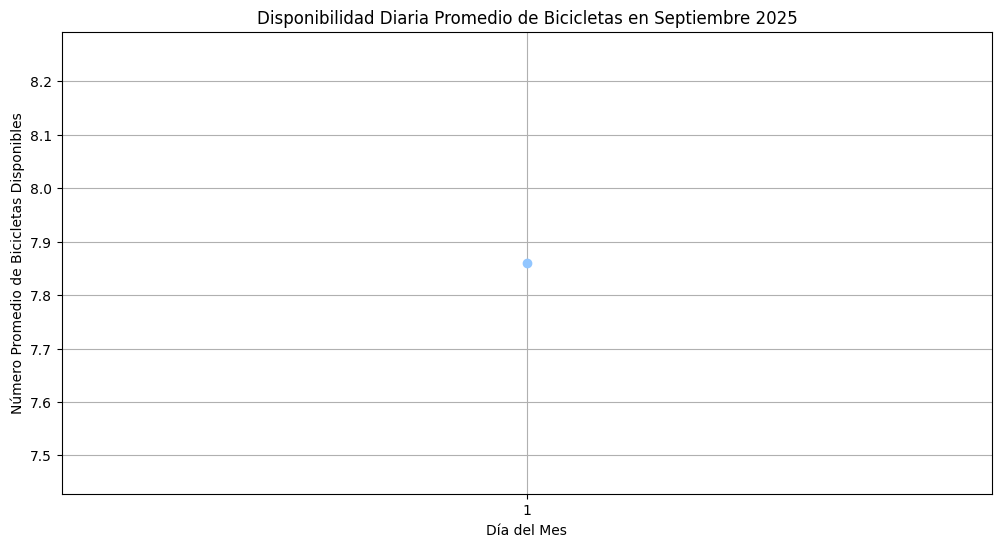

In [11]:
# Visualización de la disponibilidad diaria promedio de bicicletas
plt.figure(figsize=(12, 6))
plt.plot(df_sql_bike_availability_night_grouped['recordDay'], df_sql_bike_availability_night_grouped['availableBikes'], marker='o')
plt.title('Disponibilidad Diaria Promedio de Bicicletas en Septiembre 2025')
plt.xlabel('Día del Mes')
plt.ylabel('Número Promedio de Bicicletas Disponibles')
plt.xticks(df_sql_bike_availability_night_grouped['recordDay'])
plt.grid()
plt.show()